In [1]:
using LinearAlgebra

In [2]:
A=[2 5 ; 1 2]

2×2 Matrix{Int64}:
 2  5
 1  2

In [3]:
B=[12;8]

2-element Vector{Int64}:
 12
  8

In [6]:
F=lu(A, Val(false))

LU{Float64, Matrix{Float64}}
L factor:
2×2 Matrix{Float64}:
 1.0  0.0
 0.5  1.0
U factor:
2×2 Matrix{Float64}:
 2.0   5.0
 0.0  -0.5

In [9]:
x = A\B

2-element Vector{Float64}:
 16.0
 -4.0

In [10]:
using Plots

In [11]:
using Random

In [72]:
phi = pi/7
a = 2
b = 1.5
x_0 = 3
y_0 = -1

fx(t) = a*cos(phi)*cos(t) - b*sin(phi)*sin(t) + x_0
fy(t) = a*sin(phi)*sin(t) + b*cos(phi)*cos(t) + y_0

N = 100
ts = LinRange(0, 2*pi, N)
x = fx.(ts)
y = fy.(ts)

100-element Vector{Float64}:
  0.3514533018536288
  0.40376960394402106
  0.45043342129106523
  0.49125685517200823
  0.5260755240269881
  0.5547492253655586
  0.5771625003126328
  0.5932250985206253
  0.6028723415757455
  0.6060653834351455
  0.6027913668462217
  0.5930634751182335
  0.5769208790377713
  ⋮
 -0.5225168910786997
 -0.42622106999648013
 -0.33223565415368683
 -0.24093908964835087
 -0.15269899552318322
 -0.06787068349343284
  0.013204272767978198
  0.09019941302708712
  0.16280470502902578
  0.23072779288848766
  0.29369517430369374
  0.35145330185362855

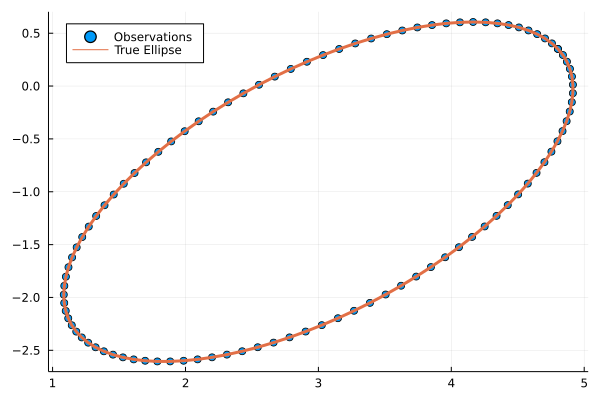

In [73]:
plot(x,y, seriestype =:scatter, label = "Observations", legend =:topleft)
plot!(fx.(ts), fy.(ts), linewidth = 3, label = "True Ellipse")

In [74]:
x = fx.(ts) + randn(N)*0.1
y = fy.(ts) + randn(N)*0.1

100-element Vector{Float64}:
  0.4383252332573462
  0.46671161248759874
  0.3571026270028766
  0.4027816682486689
  0.7409428087994454
  0.46214509238357115
  0.29837271102226975
  0.6249833318958224
  0.6956263700501669
  0.6002807494047883
  0.6499404240526959
  0.4933721069181552
  0.636313413535654
  ⋮
 -0.3454199174700712
 -0.35998338612767855
 -0.25866525348226427
 -0.19695193920647155
 -0.17889312807606572
 -0.031963310430146226
 -0.16528571020858807
  0.04110211226473953
  0.2963465618805506
  0.11726941891945508
  0.4318935479022563
  0.42022170080225707

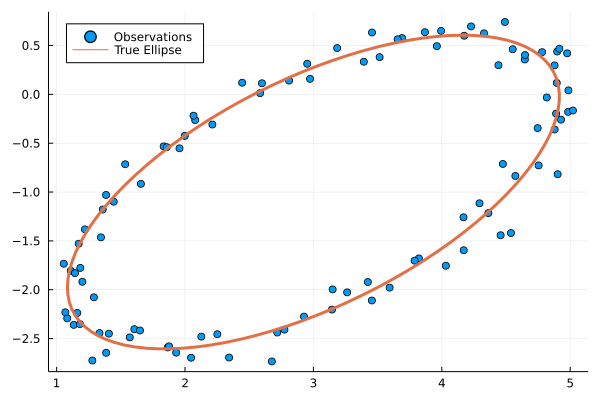

In [75]:
plot(x,y, seriestype =:scatter, label = "Observations", legend =:topleft)
plot!(fx.(ts), fy.(ts), linewidth = 3, label = "True Ellipse")

In [76]:
A = [x.^2 y.^2 x.*y x y]
b = ones(N)
p = A\b

5-element Vector{Float64}:
 -0.07960797287937663
 -0.10667951870451803
  0.11209787328522083
  0.5958844883248744
 -0.5540009231083689

In [77]:
X = LinRange(minimum(x), maximum(x), N)
Y = LinRange(minimum(y), maximum(y), N)
F = Array{Float64}(undef,N,N)
for i in 1:N
    for j in 1:N
        F[i,j] = p[1]*X[i]^2 + p[2]*Y[j]^2 + p[3]*X[i]*Y[j] + p[4]*X[i] + p[5]*Y[j]
    end
end

In [78]:
plot(x,y, seriestype =:scatter, label = "Observations", legend =:topleft)
plot!(fx.(ts), fy.(ts), linewidth = 3, label = "True Ellipse")

LoadError: MethodError: no method matching -(::Float64, ::Vector{Float64})
For element-wise subtraction, use broadcasting with dot syntax: scalar .- array
[0mClosest candidates are:
[0m  -([91m::StaticArrays.StaticArray[39m, ::AbstractArray) at C:\Users\iStem\.julia\packages\StaticArrays\0T5rI\src\linalg.jl:18
[0m  -([91m::SparseArrays.AbstractSparseMatrixCSC[39m, ::Array) at C:\Users\iStem\AppData\Local\Programs\Julia-1.7.3\share\julia\stdlib\v1.7\SparseArrays\src\sparsematrix.jl:1776
[0m  -([91m::ChainRulesCore.AbstractThunk[39m, ::Any) at C:\Users\iStem\.julia\packages\ChainRulesCore\GUvJT\src\tangent_types\thunks.jl:30
[0m  ...

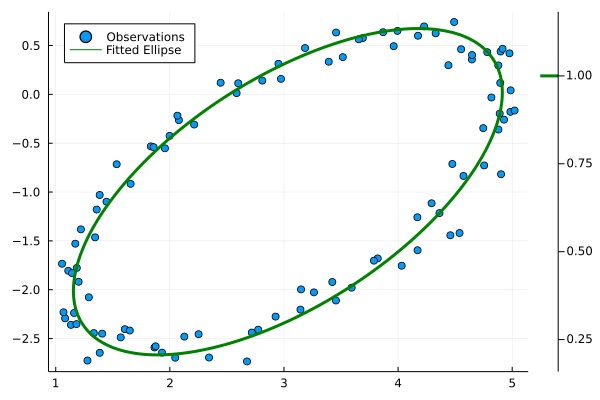

In [79]:
plot(x,y, seriestype =:scatter, label = "Observations", legend =:topleft)
contour!(X, Y, F, linewidth=3, levels=[1], color=:green)
plot!([], color=:green, label = "Fitted Ellipse")